In [24]:
from pathlib import Path
from pandas import read_csv

TRAINING_DATASET_PATH = Path("../data/train_tweets.csv")
TEST_DATASET_PATH = Path("../data/test_tweets.csv")

OG_TRAIN_DATA = read_csv(TRAINING_DATASET_PATH, sep=",")
TEST_DATASET_PATH = read_csv(TEST_DATASET_PATH, sep=",")

In [25]:
TRAIN_DATA.head()

,id,keyword,location,text,target
0,2728,crushed,"Conroe, TX",@CBSBigBrother ouch Clelli....you could almost...,0
1,9801,trapped,NaN,Hollywood movie about trapped miners released ...,0
2,5072,famine,NaN,@robertmeyer9 re: your example low food prices...,0
3,6301,hostage,Indiana,Who is Tomislav Salopek the Islamic State's Mo...,0
4,3690,destroy,Norway,Politics = Preschool Attitude: Russia orders t...,1


In [26]:
OG_TRAIN_DATA.isnull().sum(axis=0)

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [27]:
from pandas import DataFrame


def calculate_ratio(df: DataFrame, column: str) -> float:
    value_counts = df[column].value_counts()
    total_count = value_counts.sum()
    count_of_ones = value_counts.get(1, 0)
    
    if total_count == 0:
        return 0.0
    
    ratio = count_of_ones / total_count
    return ratio

print(calculate_ratio(OG_TRAIN_DATA, "target"))

0.4296597924602653


In [28]:
import pandas as pd
from sklearn.utils import resample

def balance_dataset(df: pd.DataFrame, target_column: str, desired_ratio: float) -> pd.DataFrame:
    value_counts = df[target_column].value_counts()
    total_count = value_counts.sum()
    count_of_ones = value_counts.get(1, 0)
    current_ratio = count_of_ones / total_count
    
    if current_ratio == desired_ratio:
        return df

    desired_count_of_ones = int(total_count * desired_ratio)
    additional_samples_needed = desired_count_of_ones - count_of_ones

    df_majority = df[df[target_column] == 0]
    df_minority = df[df[target_column] == 1]

    if additional_samples_needed > 0:
        df_minority_oversampled = resample(
            df_minority,
            replace=True,
            n_samples=additional_samples_needed,
            random_state=42
        )
        balanced_df = pd.concat([df, df_minority_oversampled])
    else:
        df_majority_undersampled = resample(
            df_majority,
            replace=False,
            n_samples=total_count - desired_count_of_ones,
            random_state=42
        )
        balanced_df = pd.concat([df_majority_undersampled, df_minority])

    balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)
    
    return balanced_df

TRAIN_DATA = balance_dataset(OG_TRAIN_DATA,"target",0.55)
print(calculate_ratio(TRAIN_DATA, "target"))

0.49091335443780043


In [29]:
from tweet import TweetsAnalysis

analysis = TweetsAnalysis("Pre Cleaned Dataset", TRAIN_DATA)
TRAIN_DATA.head()


,id,keyword,location,text,target
0,3589,desolate,Macclesfield,@booksbyRoger TY for the follow Go To http://t...,0
1,872,bioterror,NaN,FedEx no longer to transport bioterror germs i...,1
2,6015,hazardous,NaN,@TheBlackshag @dannyoneil too toxic...cancer.....,1
3,8654,sinkhole,NY,Gaping sinkhole opens up in Brooklyn New York ...,1
4,9493,terrorist,Iraq|Afghanistan| RSA |Baghdad,Natural lubrication !!!!!!!!!!!#MetroFmTalk,0


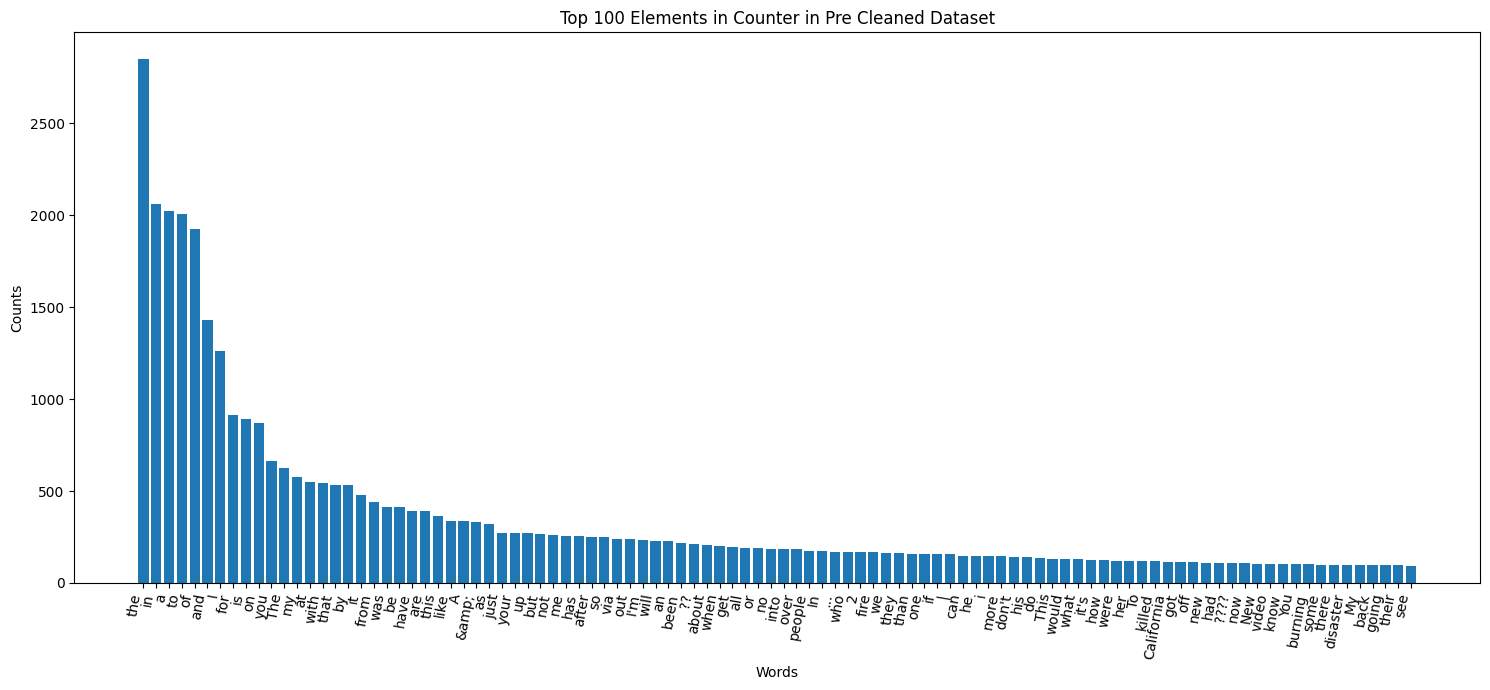

In [30]:
analysis.plt_word_occs()

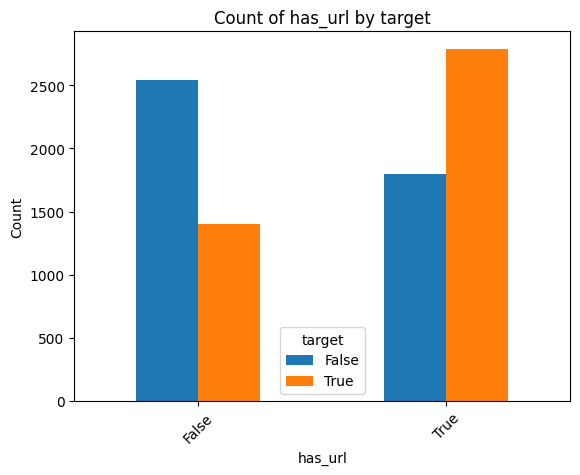

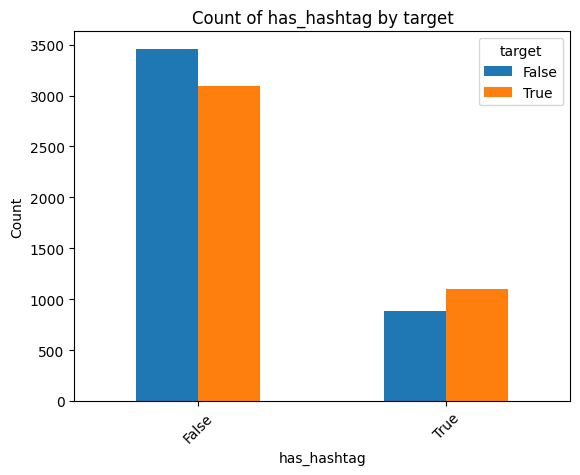

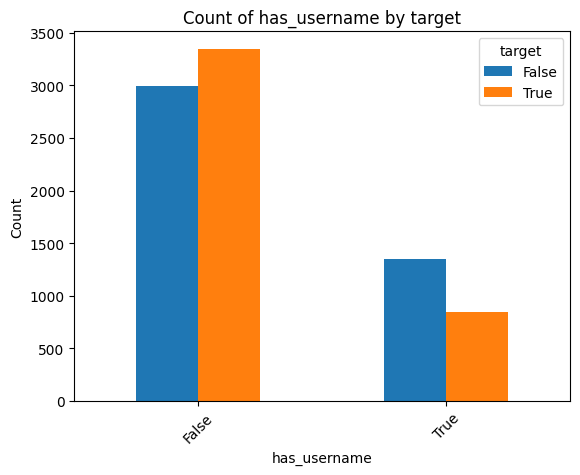

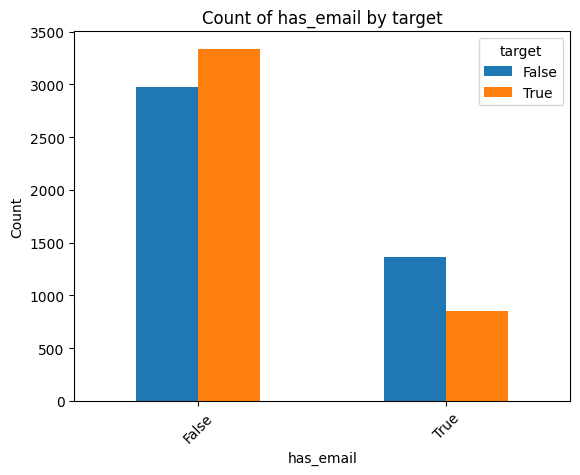

In [31]:
_CATEGORICAL_DATA = ["has_url","has_hashtag","has_username","has_email"]
PIVOT = "target"

analysis.plot_categorical_property(_CATEGORICAL_DATA, PIVOT)